<b>Project Scenario</b> <p>
As a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

- Is there a significant difference in the median value of houses bounded by the Charles river or not?
- Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
- Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
- What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic. 


<b>Column descriptions</b>
- CRIM:      per capita crime rate by town.
- ZN:        proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS:     proportion of non-retail business acres per town.
- CHAS: 	 Charles River dummy variable (1 if tract bounds river; 0 otherwise).
- NOX:	     nitric oxides concentration (parts per 10 million).
- RM: 	     average number of rooms per dwelling.
- AGE: 	     proportion of owner-occupied units built prior to 1940.
- DIS: 	     weighted distances to five Boston employment centres.
- RAD: 	     index of accessibility to radial highways.
- TAX: 	     full-value property-tax rate per 10,000.
- PTRATIO: 	 pupil-teacher ratio by town.
- LSTAT: 	 lower status of the population.
- MEDV: 	 Median value of owner-occupied homes in 1000s.

In [1]:
# Import libraries.
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Create dataframe from the given dataset in the url.
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
# Sanity check of the dataset.
# transpose() is used to make the data fit on a single line.
print('Dataframe\'s top entries: \n', boston_df.head().transpose())
print('\n\nDataframe\'s last entries: \n', boston_df.tail().transpose())

Dataframe's top entries: 
                     0          1          2          3          4
Unnamed: 0    0.00000    1.00000    2.00000    3.00000    4.00000
CRIM          0.00632    0.02731    0.02729    0.03237    0.06905
ZN           18.00000    0.00000    0.00000    0.00000    0.00000
INDUS         2.31000    7.07000    7.07000    2.18000    2.18000
CHAS          0.00000    0.00000    0.00000    0.00000    0.00000
NOX           0.53800    0.46900    0.46900    0.45800    0.45800
RM            6.57500    6.42100    7.18500    6.99800    7.14700
AGE          65.20000   78.90000   61.10000   45.80000   54.20000
DIS           4.09000    4.96710    4.96710    6.06220    6.06220
RAD           1.00000    2.00000    2.00000    3.00000    3.00000
TAX         296.00000  242.00000  242.00000  222.00000  222.00000
PTRATIO      15.30000   17.80000   17.80000   18.70000   18.70000
LSTAT         4.98000    9.14000    4.03000    2.94000    5.33000
MEDV         24.00000   21.60000   34.70000   33.

- All entries seem normal. 
- To make sure, let's check via a summary.
- We will view the number of entries and shape of the dataframe as well.

In [4]:
# Basics statistical summary of the dataset .
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


- The dataframe has only 506 entries.
- Let's check the data types as well as the completeness of the dataset- i.e. are there any missing values?

In [5]:
boston_df.info

<bound method DataFrame.info of      Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

       

In [6]:
# Alternatively check the shape
boston_df.shape

(506, 14)

In [7]:
# Check data types and for missing entries.
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


- Our data has 505 rows (excluding column names) and 14 columns.
- All data is numeric, either int64 or float64.
- The first column is not really useful as it is just an index/count. We will remove it from our dataframe over the course of the assessment.
- As part of Exploratory Data Analysis (EDA), check the column distributions.

<Figure size 1800x1800 with 0 Axes>

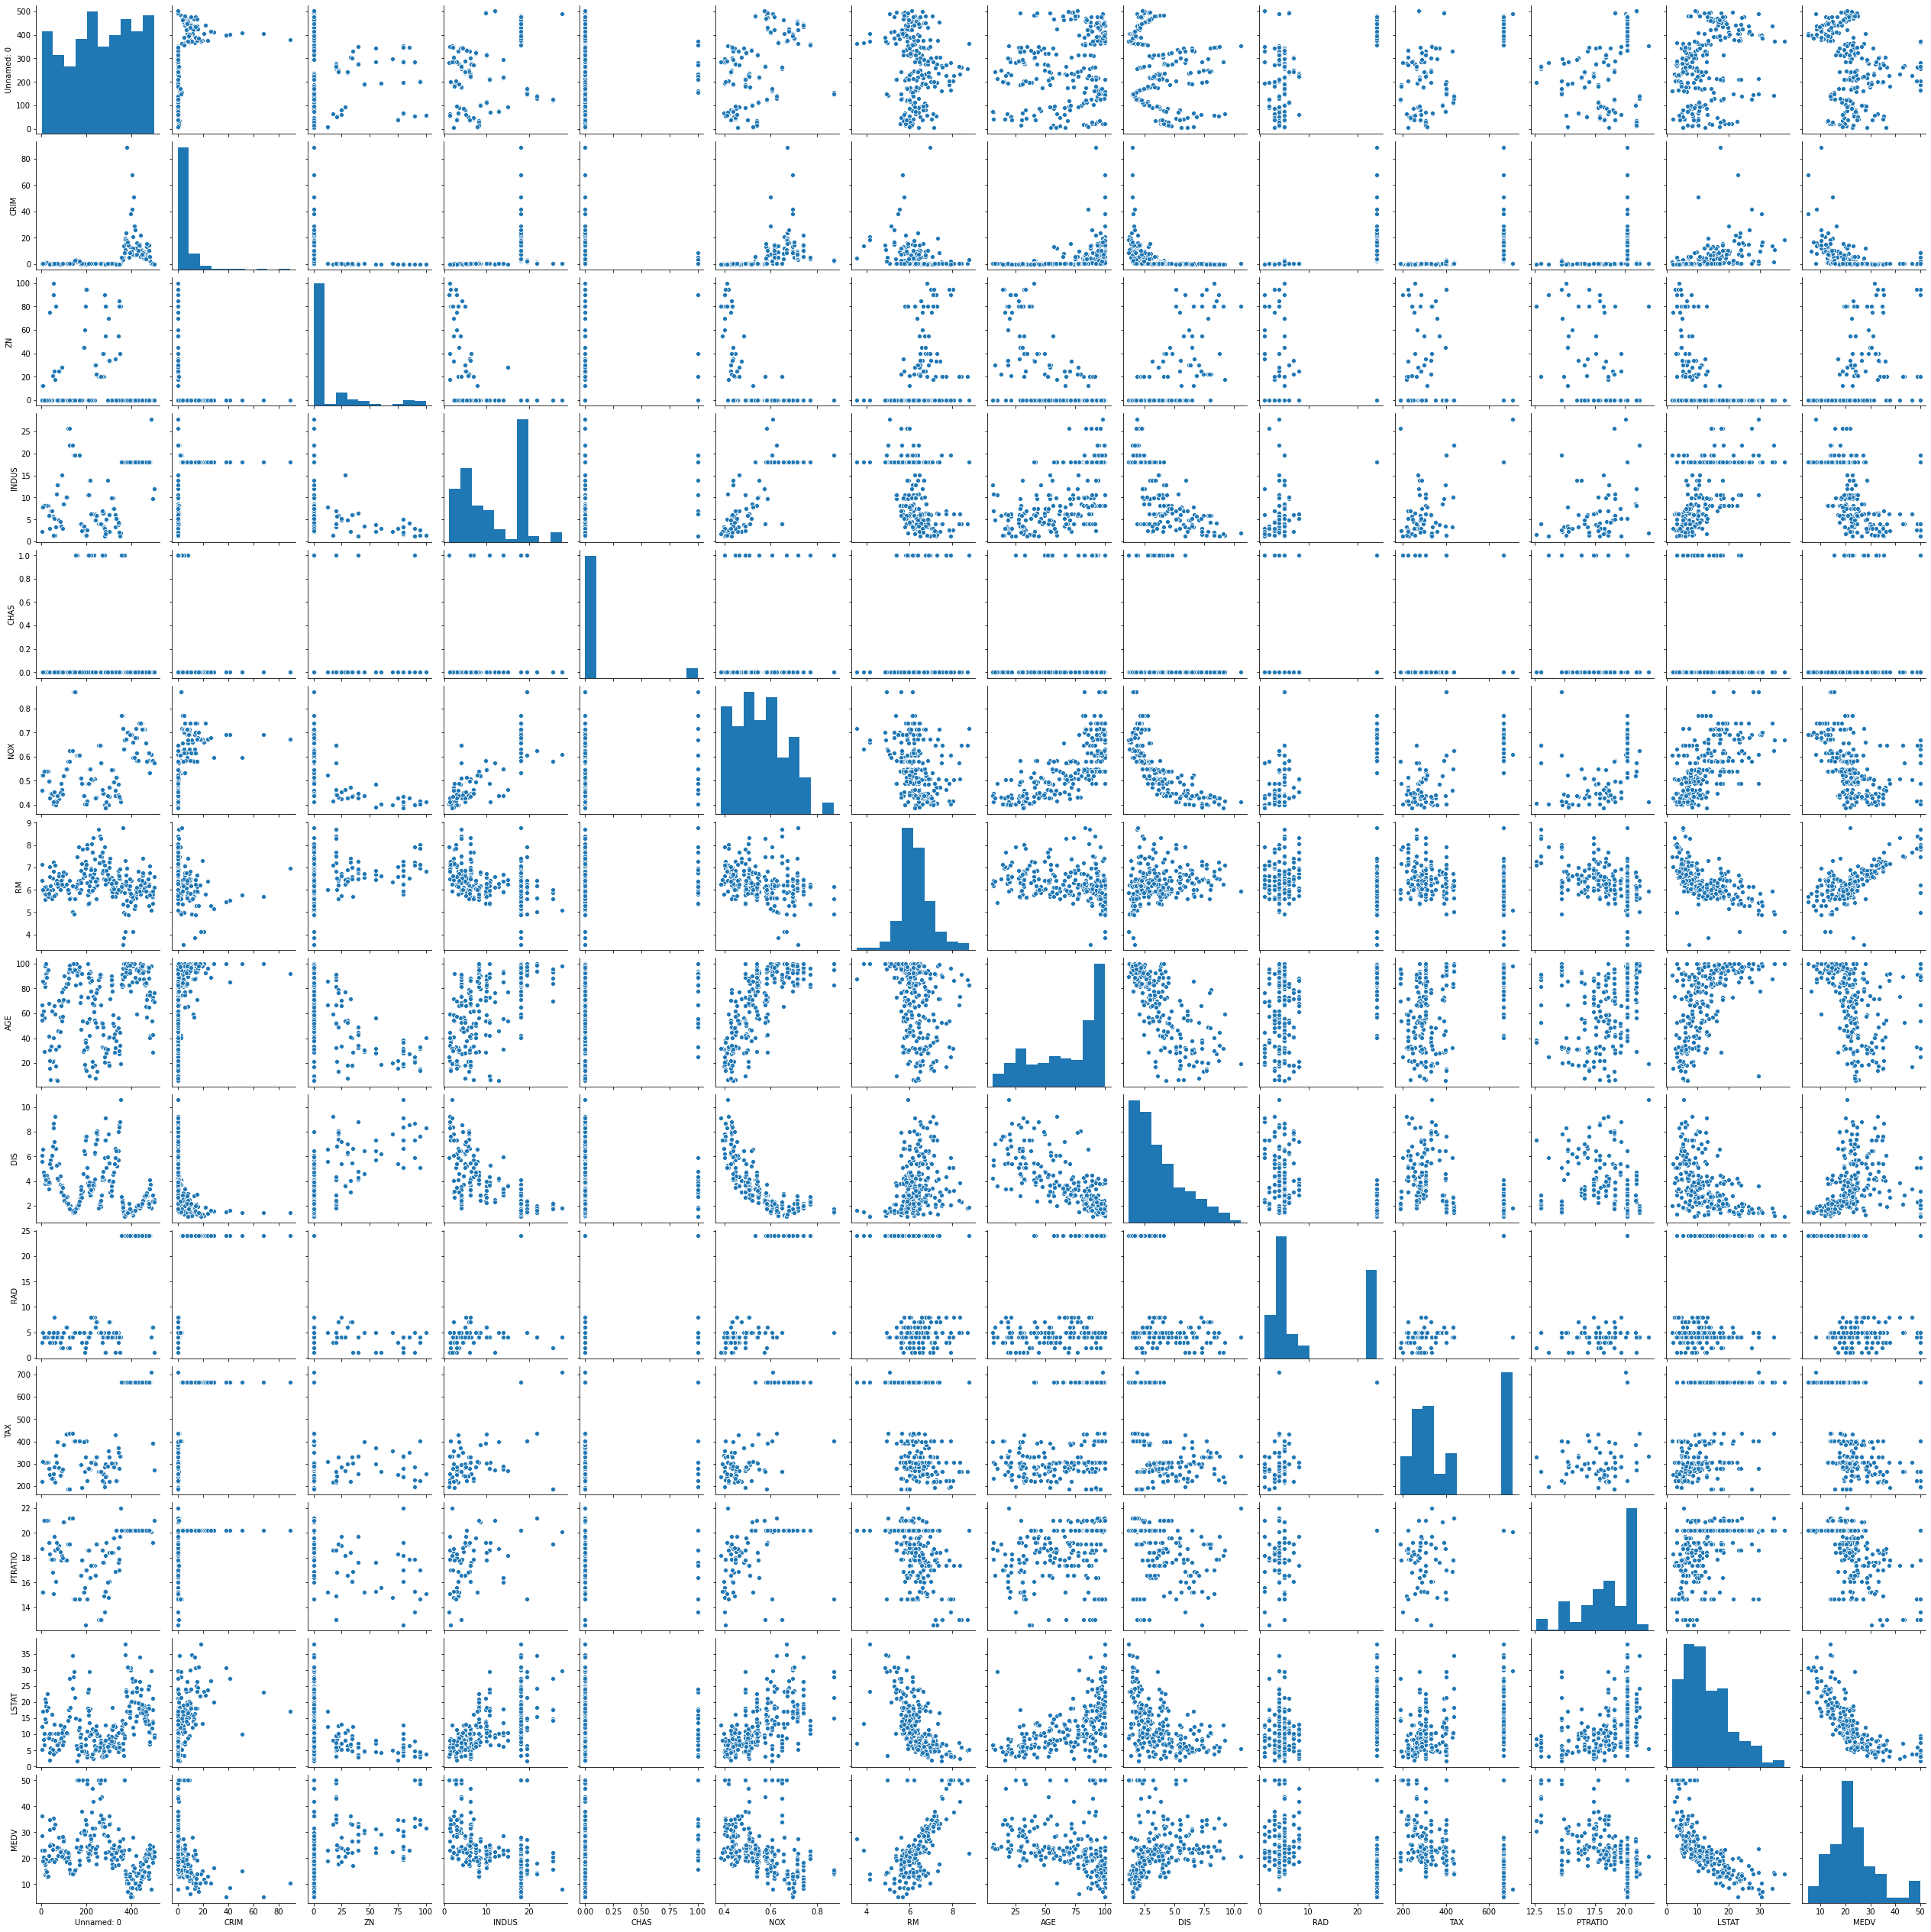

In [8]:
# For profile of an attribute, check the diagonal containing the histograms.
plt.figure(figsize = (25,25)) # Specify plot size.
plt.suptitle('Pairplots of features/attributes/columns', x = 0.5, y = 1.02, ha = 'center', fontsize = 'large')
sns.pairplot(boston_df.sample(250))
plt.show()

- Only the RM (average number of rooms per dwelling) feature shows a convincingly normal/Gaussian distribution.

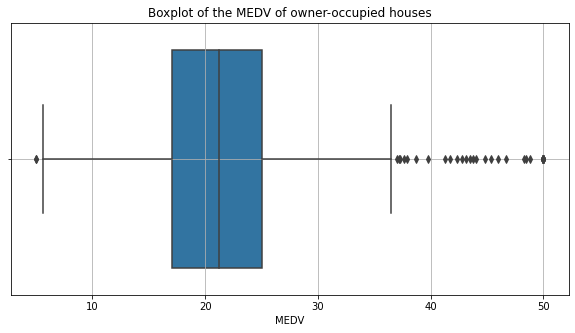

In [9]:
# Boxplot of the Median value of owner-occupied homes.
plt.figure(figsize = (10,5))
sns.boxplot(boston_df['MEDV']) # Select the 'MEDV' attribute/column.
plt.title('Boxplot of the MEDV of owner-occupied houses')
plt.grid()
plt.show()

- The leftmost vertical line is the minimum.
- The rightmost vertical line is the maximum.
- The first vertical line of the box is the lower quartile.
- The middle vertical line in the box is the median (which corresponds to the mean if the distribution is Gaussian)
- The last vertical line of the box is the upper quartile.
- Values outside the lower and upper quartiles are outliers (not anomalies).
- We see only one outlier lower than the lower quartile while most of the outliers are higher than the upper quartile.
- The boxplot seems to show an almost symmetric distribution-sans the outliers.

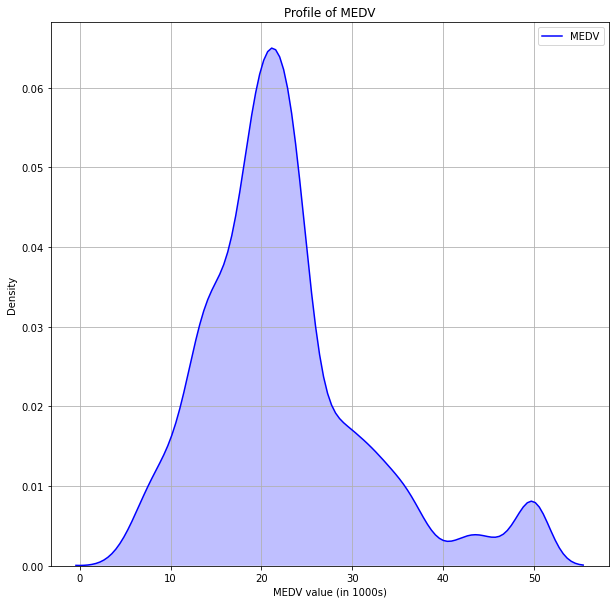

In [10]:
# We can further visualize the profile of the MEDV feature using a Kernel Density Estimate (kde) plot.
plt.figure(figsize = (10, 10))
sns.kdeplot(boston_df['MEDV'], shade = True, color = 'blue')
plt.grid()
plt.xlabel('MEDV value (in 1000s)')
plt.ylabel('Density')
plt.title('Profile of MEDV')
plt.show()

- Most of the MEDV values are around 22 000

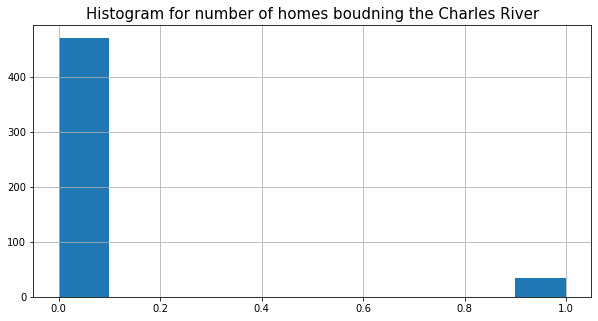

In [11]:
# Histogram for the Charles River variable.
# CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
plt.figure(figsize=(10, 5))
plt.hist(boston_df['CHAS'], bins = 10)
plt.title('Histogram for number of homes boudning the Charles River', fontsize = 15)
plt.grid()
plt.show()

- The histogram shows the presence of only two classes, i.e if the property bounds the Charles River of not.
- Most of the homes do not bound the river.

In [12]:
# Create a copy of the original dataframe before applying filters
boston_df_OG = boston_df # 'OG' is alias of 'original'.

In [13]:
# Provide a boxplot for the MEDV variable vs the AGE variable. 
# Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older.

boston_df.loc[(boston_df['AGE'] <= 35),'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70),'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

In [14]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,between 35 and 70 years
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 years and older
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 years and older
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 years and older


In [15]:
# Remove the first column 'Unnamed'.
boston_df_edited  = boston_df.iloc[:, 1:]
boston_df_edited.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


In [16]:
boston_df_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    float64
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    float64
 9   TAX        506 non-null    float64
 10  PTRATIO    506 non-null    float64
 11  LSTAT      506 non-null    float64
 12  MEDV       506 non-null    float64
 13  age_group  506 non-null    object 
dtypes: float64(13), object(1)
memory usage: 55.5+ KB


- We created a new dataframe but still have 14 columns with the 'age_group' one added in the place of 'Unnamed'.

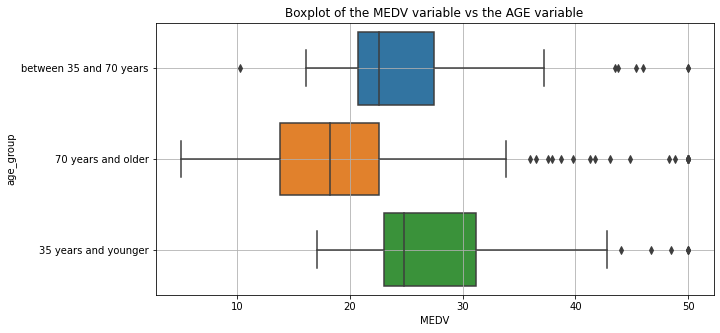

In [17]:
# Create a boxplot.
plt.figure(figsize = (10,5))
sns.boxplot(x = boston_df_edited.MEDV, y = boston_df_edited.age_group, data = boston_df_edited) # Use dot notation to specify the dependent and independent variables.
plt.title('Boxplot of the MEDV variable vs the AGE variable')
plt.grid()
plt.show()

- From the boxplot, only the 70+ years attribute has and outlier.
- However, there is a greater spread for the 35-70 years group.
- Generally, the 35-70 years group pays higher prices for their accommodation while the older group pays significantly lower.

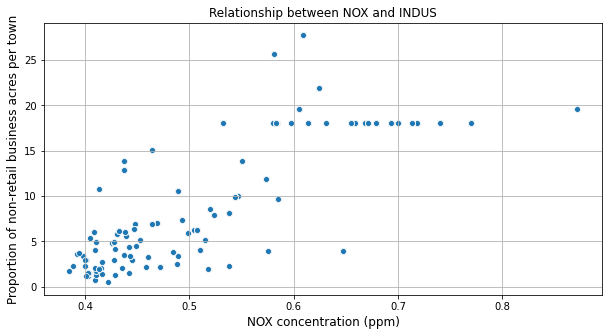

In [18]:
# Provide a scatter plot to show the relationship between NOX concentrations & the proportion of non-retail business acres per town. 
# We revert to the initial dataset to which we had not applied the age filters.
plt.figure(figsize = (10,5))
sns.scatterplot(x = boston_df_OG.NOX, y = boston_df_OG.INDUS, data = boston_df)
plt.title('Relationship between NOX and INDUS', fontsize = 12)
plt.xlabel('NOX concentration (ppm)', fontsize = 12)
plt.ylabel('Proportion of non-retail business acres per town', fontsize = 12)
plt.grid()
plt.show()

- There is a general increase in proportion of non-retail businesses with an increase in the NOX concentration.
- We do expect to have more pollution around industrial rather than retail businesses.
- The relationship is complex-it is not linear.

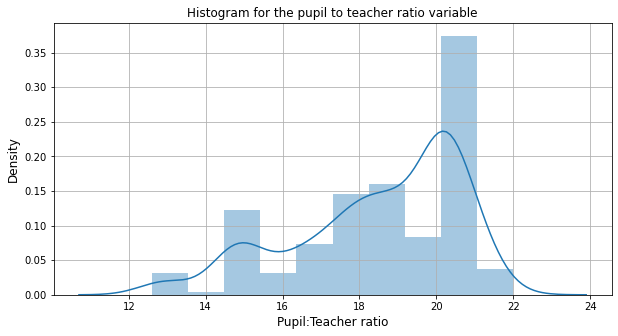

In [19]:
# Histogram of the pupil:teacher ratio.
plt.figure(figsize = (10,5))
sns.distplot(boston_df_OG['PTRATIO'], bins = 10, kde=True, hist=True)
plt.title('Histogram for the pupil to teacher ratio variable', fontsize = 12)
plt.xlabel('Pupil:Teacher ratio', fontsize = 12)
plt.ylabel('Density', fontsize = 12)
plt.grid()
plt.show()

- Pupil:Teacher ratio is lower than 23.
- More commonly, it is less than 20.
- This is a low ratio  indicating higher probability of more personalized, almost one-to-one tuition.

<b>Question</b>
Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples):

Hypotheses

-  Null hypothesis, $H_0$: Both average MEDV are the same.

-  Alternative hypothesis, $H_1$: Both average MEDV are NOT the same.


In [20]:
# Use the edited dataframe.
boston_df_edited.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [21]:
# Compare the 'classes' for bounding the river.
boston_df_edited["CHAS"].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [22]:
# Separate the classes.
positive_class = boston_df_edited[boston_df_edited['CHAS'] == 0]['MEDV']
negative_class = boston_df_edited[boston_df_edited['CHAS'] == 1]['MEDV']

In [23]:
stats.ttest_ind(positive_class, negative_class, axis = 0, equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

<b>Analysis</b>
- Since p-value is less than alpha value of 0.05, we reject the null hypothesis since there is  statistical significance.

<b>Question</b>
- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation).

Hypotheses:
-  Null hypothesis, $H_0:$ NOX is not correlated with INDUS.
-  Alternative hypothesis, $H_1:$ NOX is correlated with INDUS.

In [24]:
pearson, p_value = stats.pearsonr(boston_df_OG['NOX'], boston_df_OG['INDUS'])
print('Pearson Coefficient value={}, p-value={}'.format(pearson, p_value)) 

Pearson Coefficient value=0.763651446920915, p-value=7.913361061239593e-98


<b>Analysis</b>
- Since the p-value (Sig. (2-tailed) < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric Oxide and non-retail business acres per town.

<b>Question</b>
- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis).

Hypotheses

-  Null hypothesis, $H_0:$: weighted distances to five Boston employment centres are not related to median value.

-  Alternative hypothesis, $H_1:$: weighted distances to five Boston employment centres are related to median value.

In [25]:
import statsmodels.api as sm
med = boston_df_edited['MEDV']
dis = boston_df_edited['DIS']
x = sm.add_constant(med)

In [26]:
results = sm.OLS(dis, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DIS   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 01 Jul 2021   Prob (F-statistic):           1.21e-08
Time:                        08:29:29   Log-Likelihood:                -1078.0
No. Observations:                 506   AIC:                             2160.
Df Residuals:                     504   BIC:                             2168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5057      0.240     10.428      0.000       2.034       2.978
MEDV           0.0572      0.010      5.795      0.000       0.038       0.077
==============================================================================
Omnibus:                       70.837   Durbin-Watson:                   0.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.167
Skew:                           1.000   Prob(JB):                     4.82e-22
Kurtosis:                       3.809   Cond. No.                         64.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# The linear correlation coefficient is calculated as follows.
lin_coef = np.sqrt(0.062)  
print(lin_coef)

0.24899799195977465


<b>Discussion</b>
- The linear correlation coefficient is 0.25 indicating a weak linear relationship between the two variables.

In [28]:
# Get a detailed breakdown of the correlation coefficients between all the variables.
boston_df_OG.corr()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
Unnamed: 0,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,0.258465,-0.226604
CRIM,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.398736,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.079971,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.203784,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.302211,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.686002,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626


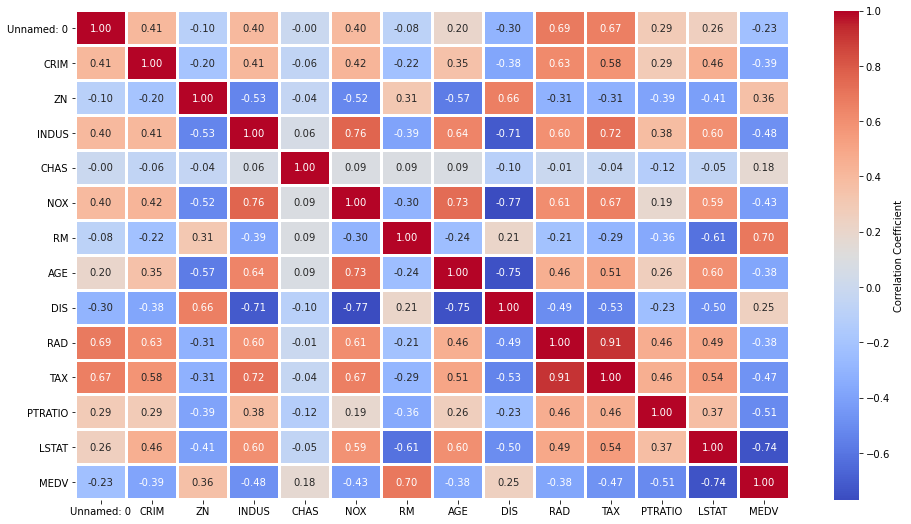

In [29]:
# Visualize correlation using a heatmap.
plt.figure(figsize=(16,9))
sns.heatmap(boston_df_OG.corr(), cmap = 'coolwarm', annot = True, fmt = '.2f', linewidths = 2, cbar = True, cbar_kws={'label': 'Correlation Coefficient'})
plt.show()

<b>Discussion</b>
- By studying the color scheme we can see that there are some variables that are strongly, positively, linearly correlated such as TAX and IND (the strongest, actually).
- On the opposite end of the spectrum we have LSTAT and MEDV which are strongly, negatively linearly correlated.
- Otherwise, the majority of the variables show a moderate linear correlation.

<b>Summary</b>
- We have analyzed the dataset visually, qualitatively and quantitavely.
- I believe we met all the requirements to satisfy what you can call a simple data analysis project.
- Of course we can do more analysis but this is enough for now-unless you want to add more enrichment tasks.